# Paper Folding Problem
"A Python Introductory Assignment Let's try to use Python."

[Link](https://diver.diveintocode.jp/curriculums/1385)

## [Problem 1] 
Implementation using exponentiation arithmetic operators

> Create a program that uses the exponentiation arithmetic operator. As a template, we have prepared a code that calculates the thickness of a sheet of paper when it is folded once. Rewrite the code to calculate the thickness when the paper is folded 43 times.

### Solve

In [21]:
'''
    Input: 
        initial_thickness: thickness of the paper before folding
        n_folds: number of folds performed
    Output:
        folded_thickness(): thickness after being folded
'''
def folded_thickness_exp(initial_thickness, n_folds):
    return initial_thickness * (2**n_folds)

In [22]:
THICKNESS = 0.00008

In [23]:
# fold once
n = 1
print(f'thickness if folded {n} times: {folded_thickness_exp(THICKNESS, n)}')

thickness if folded 1 times: 0.00016


In [24]:
# fold twice
n = 2
print(f'thickness if folded {n} times: {folded_thickness_exp(THICKNESS, n)}')
# fold three times
n = 3
print(f'thickness if folded {n} times: {folded_thickness_exp(THICKNESS, n)}')

thickness if folded 2 times: 0.00032
thickness if folded 3 times: 0.00064


In [25]:
# 43
n = 43
print(f'thickness if folded {n} times: {folded_thickness_exp(THICKNESS, n)}')

thickness if folded 43 times: 703687441.77664


## [Problem 2] 
Unit Conversion

> If the unit is meters, it's hard to feel the difference, so please convert the unit to ◯◯ 10,000 kilometers and display it.

In [26]:
'''
    Input: 
        meter: distance in meter
    Output:
        to_kilometer(): distance in kilometer
'''
def to_kilometer(meter):
    kilometer = meter / 1000
    return round(kilometer, 2) # round to 2 decimal points

In [27]:
final_thickness = to_kilometer(folded_thickness_exp(THICKNESS, 43))
print(f'43 folds thickness: {final_thickness:,} kilometers') # we use f'{number:,}' to add thousand separator

43 folds thickness: 703,687.44 kilometers


In [28]:
# compare with the moon
MOON_DISTANCE = 384400 # kilometers
print(f'Folded paper reached the moon? {final_thickness >= MOON_DISTANCE}') 

Folded paper reached the moon? True


## [Problem 3] 
Create using a for statement

> Next, create a program that uses the for statement.

In [29]:
# we implement the folded_thickness function using for loop this time

def folded_thickness_for(initial_thickness, n_folds):
    thickness = initial_thickness
    for _ in range(n_folds):
        thickness *= 2
    return thickness

print(folded_thickness_for(THICKNESS, 43))

# check if same result as previous implementation
print('Valid? ', folded_thickness_for(THICKNESS, 43) == folded_thickness_exp(THICKNESS, 43)) 

703687441.77664
Valid?  True


## [Problem 4] 
Comparison of calculation time
> Use the template below to output the execution times of the two methods and compare them. Compare the time in the range excluding the parts used by either method, such as variable definition and print​

**NOTE**

We need to modify our function into using Decimal type for testing purposes since float/integer cannot handle large enough numbers that's needed for testing purposes

In [30]:
from decimal import Decimal

def folded_thickness_exp_decimal(initial_thickness, n_folds):
    return Decimal(initial_thickness) * (Decimal(2)**n_folds)

def folded_thickness_for_decimal(initial_thickness, n_folds):
    thickness = Decimal(initial_thickness)
    for _ in range(n_folds):
        thickness *= Decimal(2)
    return thickness

In [31]:
import time

'''
    The test function just runs the function with all given argument and show elapsed time
'''
def test_time(function, *arguments):
    start = time.time_ns()
    #####
    function(*arguments)
    #####
    elapsed_time = time.time_ns() - start
    print("time : {}[ns]".format(elapsed_time))

Documentation for time.time_ns() [here](https://docs.python.org/3/library/time.html#time.time_ns)

In [32]:
test_values = [50, 100, 1000, 10000, 100000, 1000000, 3000000, 3100000]

The exponent implementation test

In [33]:
for n in test_values:
    print(f'---Test n: {n} ---')
    test_time(folded_thickness_exp_decimal, THICKNESS, n)

---Test n: 50 ---
time : 0[ns]
---Test n: 100 ---
time : 0[ns]
---Test n: 1000 ---
time : 0[ns]
---Test n: 10000 ---
time : 0[ns]
---Test n: 100000 ---
time : 0[ns]
---Test n: 1000000 ---
time : 0[ns]
---Test n: 3000000 ---
time : 0[ns]
---Test n: 3100000 ---
time : 0[ns]


The for loop implementation test

In [34]:
for n in test_values:
    print(f'---Test n: {n} ---')
    test_time(folded_thickness_for_decimal, THICKNESS, n)

---Test n: 50 ---
time : 0[ns]
---Test n: 100 ---
time : 499000[ns]
---Test n: 1000 ---
time : 499100[ns]
---Test n: 10000 ---
time : 2499600[ns]
---Test n: 100000 ---
time : 32502600[ns]
---Test n: 1000000 ---
time : 312499100[ns]
---Test n: 3000000 ---
time : 913504200[ns]
---Test n: 3100000 ---
time : 914032200[ns]


Time varies by execution so we can also use magic commands to benchmark these codes

In [35]:
%%timeit
# benching exponent
folded_thickness_decimal(THICKNESS, 100000)

3.43 µs ± 158 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [36]:
%%timeit
# benching for loop
folded_thickness_for_decimal(THICKNESS, 100000)

31.6 ms ± 1.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Very small difference in the two implementations in our little tests, though of course the built in exponent operator is much more efficient

## [Problem 5] 
Saving to a list 


> First, create an empty list.
> Next, add the value before folding to the list.
> Add the value of the process of folding the paper up to n times in the for statement to the list.


In [37]:
recorded_thickness = [THICKNESS] # starts with the initial thickness
recorded_thickness

[8e-05]

In [38]:
'''
    Here we take advantage of the fact that we need to construct a list and:
    - Calculate next fold (n+1) from previous fold (n), which is the last element of the list
    - And append the new element to the list
'''
for _ in range(43):
    recorded_thickness.append(recorded_thickness[-1] * 2)

print('List length: ', len(recorded_thickness))
print('Recorded thickness: ', recorded_thickness)

List length:  44
Recorded thickness:  [8e-05, 0.00016, 0.00032, 0.00064, 0.00128, 0.00256, 0.00512, 0.01024, 0.02048, 0.04096, 0.08192, 0.16384, 0.32768, 0.65536, 1.31072, 2.62144, 5.24288, 10.48576, 20.97152, 41.94304, 83.88608, 167.77216, 335.54432, 671.08864, 1342.17728, 2684.35456, 5368.70912, 10737.41824, 21474.83648, 42949.67296, 85899.34592, 171798.69184, 343597.38368, 687194.76736, 1374389.53472, 2748779.06944, 5497558.13888, 10995116.27776, 21990232.55552, 43980465.11104, 87960930.22208, 175921860.44416, 351843720.88832, 703687441.77664]


## [Problem 6]
Displaying a line graph

> A library called Matplotlib is used to draw the graph. 

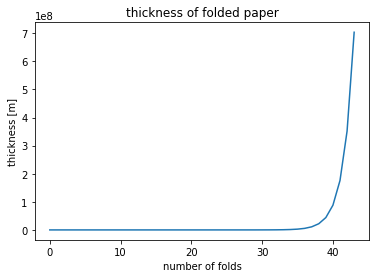

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness [m]")
plt.plot(recorded_thickness)  # Enter the variable name of the list in "List name"
plt.show()

## [Problem 7] 
Customizing graphs

> Let's customize the graph to make it easier to see. Create at least 3 customized graphs.

Here's i'll demonstrate one custom graph with all the changes below:
- Change graph size
- Customize the line
- Customize the markers
- Change font of title
- Change tick size / distance

All plotting arguments can be found 
- [Line & Marker](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D)
- [Tick Filtering](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html)
- [Tick Style](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tick_params.html)
- [Figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)
- [Text](https://matplotlib.org/3.1.1/api/text_api.html)

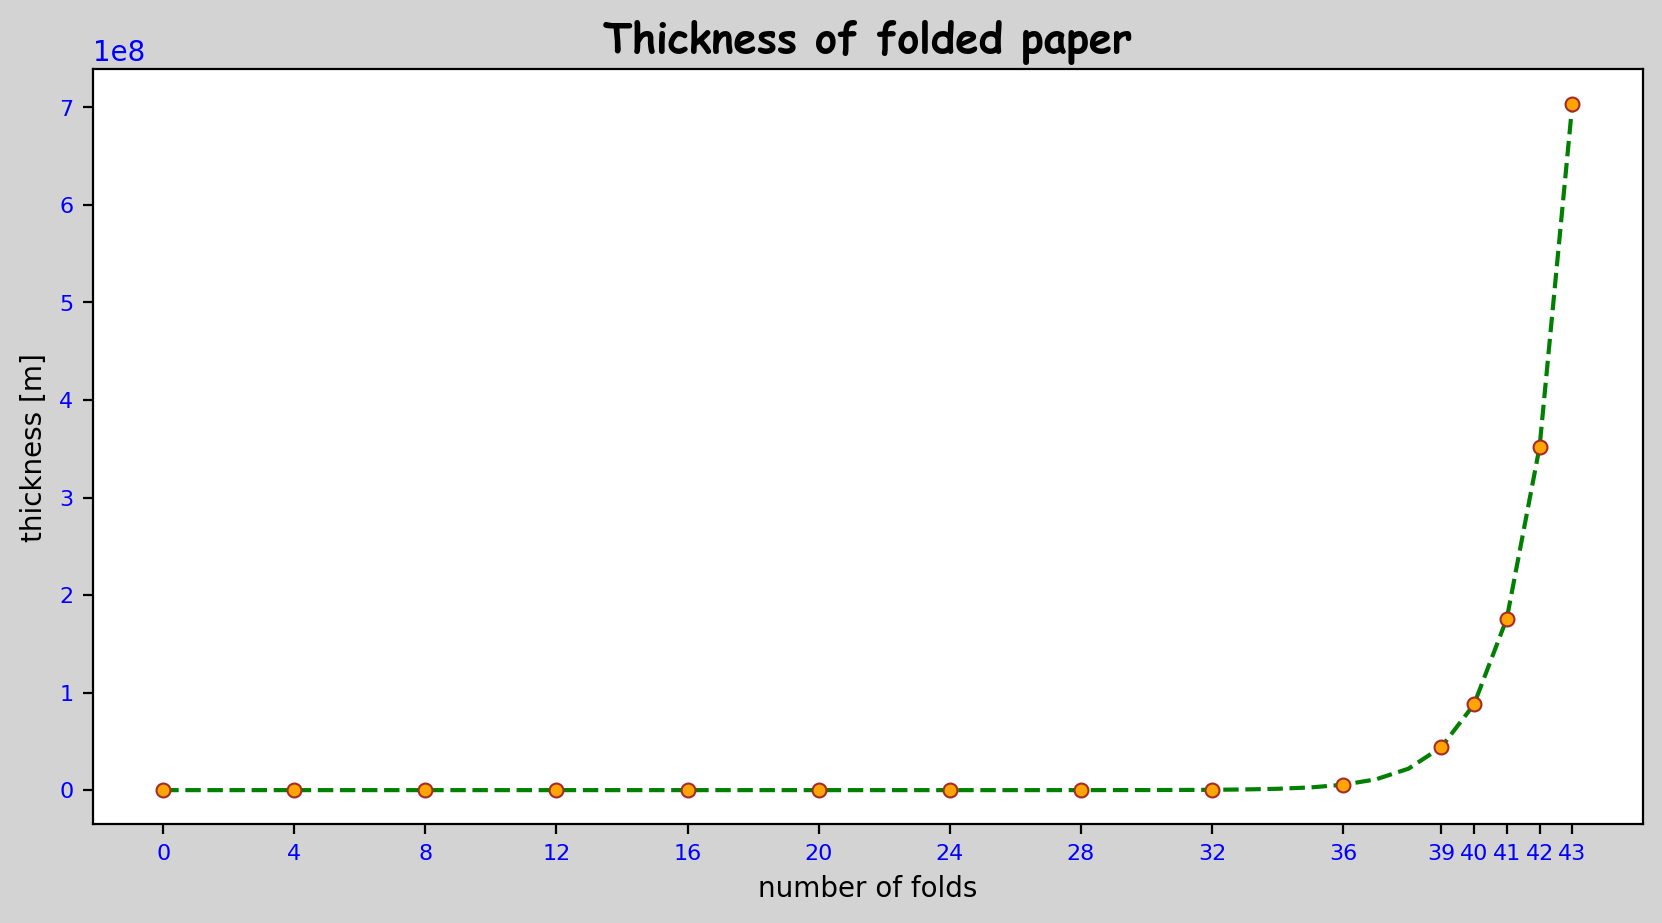

In [40]:
%matplotlib inline
import numpy as np

# figure config
fig = plt.figure(
    figsize=(10,5), # size
    dpi=200, # resolution
    facecolor='lightgray' # background color
)

line_style = dict(
    color='green',
    linestyle='--', # dashed line
    linewidth=1.5,
)

MARKER_SIZE = 5
plot_data = recorded_thickness

# This is for specifying which marker/x-tick to draw on to the plot
MARKER_MASK = np.append(
    np.arange(0, len(plot_data) - 5, 4), # Draw every 4th ones of the early markers
    np.arange(len(plot_data) - 5, len(plot_data), 1), # Last 5 markers are all shown
)

marker_style = dict(
    marker = 'o', # dot marker
    markersize = MARKER_SIZE,
    markevery= MARKER_MASK, # only show some markers
    markerfacecolor = 'orange',
    markeredgecolor= 'brown',
    markeredgewidth= 0.15 * MARKER_SIZE,
)

plt.title("Thickness of folded paper", fontsize=15, family='cursive', weight='semibold')
plt.xlabel("number of folds")
plt.ylabel("thickness [m]")
plt.plot(plot_data, figure=fig,**line_style, **marker_style)

# config x/y ticks
plt.xticks(MARKER_MASK) # Only show some of the important ticks
plt.tick_params(labelsize=8, labelcolor='blue')
plt.show()